c:\Users\janna\miniconda3\envs\data_analysis\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


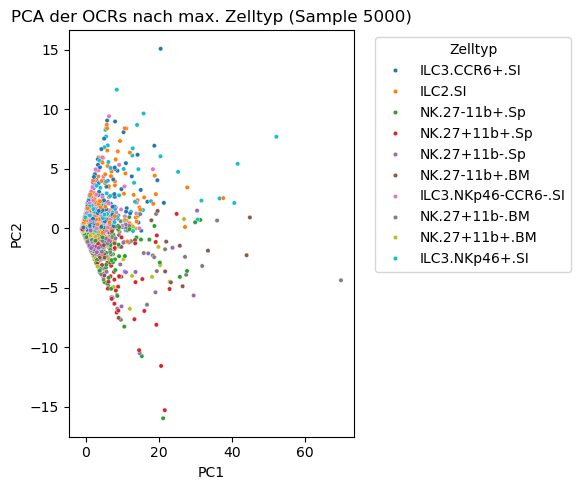

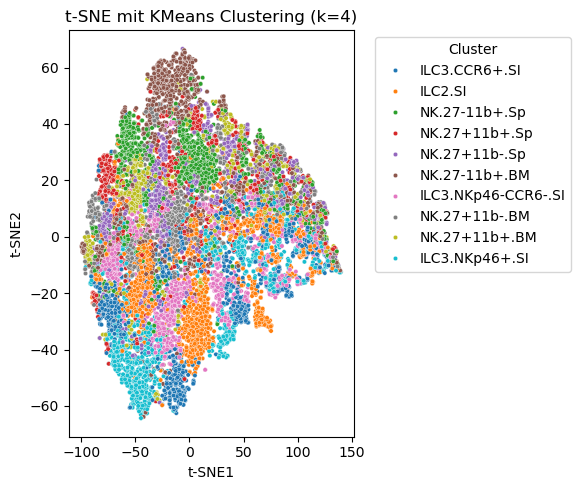

c:\Users\janna\miniconda3\envs\data_analysis\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


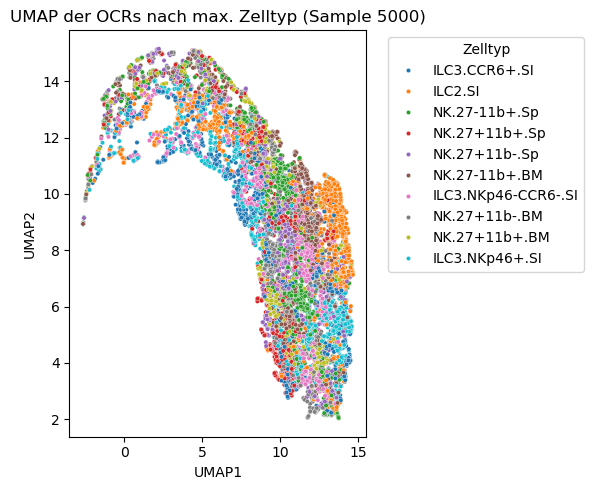

In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns
import matplotlib.pyplot as plt

# load data set
df_raw = pd.read_csv("data/ImmGenATAC18_AllOCRsInfo.csv", header=0, quotechar='"', encoding='latin1')

# select columns with NK and ILC
celltype_cols = [
    "ILC2.SI", "ILC3.NKp46-CCR6-.SI", "ILC3.NKp46+.SI", "ILC3.CCR6+.SI",
    "NK.27+11b-.BM", "NK.27+11b+.BM", "NK.27-11b+.BM",
    "NK.27+11b-.Sp", "NK.27+11b+.Sp", "NK.27-11b+.Sp"
]

# indexing
ocr_ids = df_raw.iloc[:, 0].values
df_expr = df_raw[celltype_cols]
df_expr.index = ocr_ids
df_expr.index.name = "OCR_ID"

# Sample of 5000
df_sample = df_expr.sample(n=10000, random_state=42)

#scale data
from sklearn.preprocessing import StandardScaler
df_scaled = pd.DataFrame(StandardScaler().fit_transform(df_sample), index=df_sample.index, columns=df_sample.columns)

# coloring according to cell type
max_celltypes = df_sample.idxmax(axis=1)

# PCA
pca = PCA(n_components=10)
pca_result = pca.fit_transform(df_scaled)

# t-SNE
tsne = TSNE(n_components=2, perplexity=50, random_state=30, learning_rate=500, n_iter=1500)
tsne_result = tsne.fit_transform(pca_result)

# PCA Plot 
plt.figure(figsize=(6, 5))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=max_celltypes, s=10, palette="tab10")
plt.title("PCA der OCRs nach max. Zelltyp (Sample 5000)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Zelltyp")
plt.tight_layout()
plt.show()


from sklearn.cluster import KMeans


n_clusters = 4

# KMeans Clustering 
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
cluster_labels = kmeans.fit_predict(tsne_result)

# Plot t-SNE with KMeans Clusters
plt.figure(figsize=(6, 5))
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=max_celltypes
                , palette="tab10", s=10)
plt.title(f"t-SNE mit KMeans Clustering (k={n_clusters})")
plt.xlabel("t-SNE1")
plt.ylabel("t-SNE2")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

import umap

# UMAP mit denselben Daten wie PCA/t-SNE
umap_model = umap.UMAP(n_components=2, random_state=42, n_neighbors=5, min_dist=0.05
                       )
umap_result = umap_model.fit_transform(df_scaled)

# UMAP Plot mit Färbung nach max. Zelltyp
plt.figure(figsize=(6, 5))
sns.scatterplot(x=umap_result[:, 0], y=umap_result[:, 1], hue=max_celltypes, palette="tab10", s=10)
plt.title("UMAP der OCRs nach max. Zelltyp (Sample 5000)")
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Zelltyp")
plt.tight_layout()
plt.show()







To further determine question 1.iv, we perform PCA and plot the result vor visualization. After we peform t-SNE and KMeans. We assign each OCR a cell type, they are the most available in and color the OCRs in the t-SNE plot according to the cell type to determine, if cell type clusters form. The lot show a slight clustering according to cell type. However, the clustering is not very defined and they are data points not clustering together and being scattered across the plot. Next, we compute a umap and see a similar, slight but undefined clustering like in the t-SNE plot. All in all the plots show, that the OCRs cluster slightly according to their signal in different cell types. We will plot the Gini index next, to prove our hypothesis further.